# Visualizing Earnings Based on College Majors
In this project we'll just have fun around using pandas with its built-in visualization. Let's try to analyze the data and to discover underlying insights about college majors from the year 2016 and 2017.

## Dataset Information
* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [7]:
recent_grads.shape

(173, 21)

In [8]:
recent_grads.dropna(inplace=True)

In [9]:
recent_grads.shape

(172, 21)

## Data Visualization
### Sample Size vs Median Salary

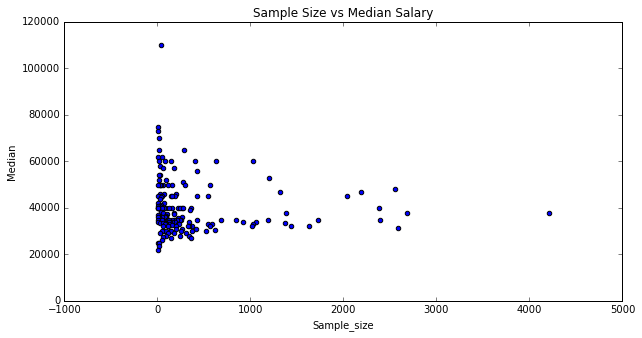

In [10]:
recent_grads.plot(kind='scatter', x='Sample_size', y='Median', title='Sample Size vs Median Salary', figsize=(10,5))

From the graph above, we can see that there is a popular college major - obviously seen to be the highest sample size - that has a median salary of around 35-40k. We also can deduce, in summary, that students in popular majors don't make more money than less popular ones. In fact there is one major that makes the highest earning, but then only a few graduated from it.

### Sample Size vs Unemployment Rate

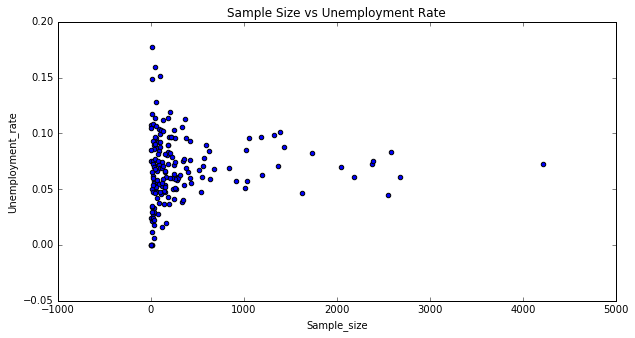

In [11]:
recent_grads.plot(kind='scatter', x='Sample_size', y='Unemployment_rate', title='Sample Size vs Unemployment Rate', figsize=(10,5))

The same analysis can be compared with the plot above. Most of the majors have an unemployment rate that ranges from ~0.10 down to ~0.05. There are also less popular ones that could either be very in-demand (0.0 unemployment rate) or difficult to find for job positions (0.10 and above).

### Full Time vs Median Salary

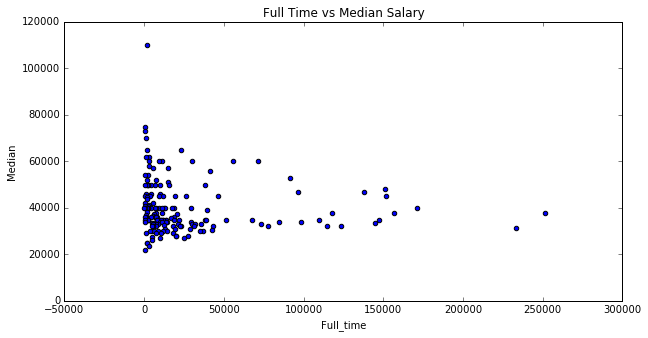

In [12]:
recent_grads.plot(kind='scatter', x='Full_time', y='Median', title='Full Time vs Median Salary', figsize=(10,5))

From the graph above we don't see connection between the two features. Furthermore, majors with great amount of full time employees don't really make that much as compared to less popular majors. Based on the plot, most full time employees earn around 20k up to 50k.

### Share of Women (in total) vs Unemployment Rate

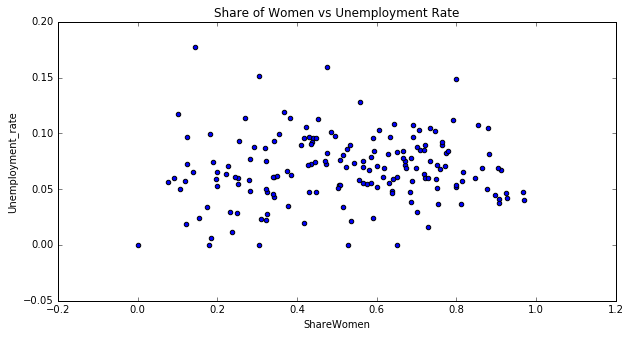

In [13]:
recent_grads.plot(kind='scatter', x='ShareWomen', y='Unemployment_rate', title='Share of Women vs Unemployment Rate', figsize=(10,5))

Just by looking at the graph we can see that there is no correlation between unemployment rate and women.

### Men and Women vs Median Salary

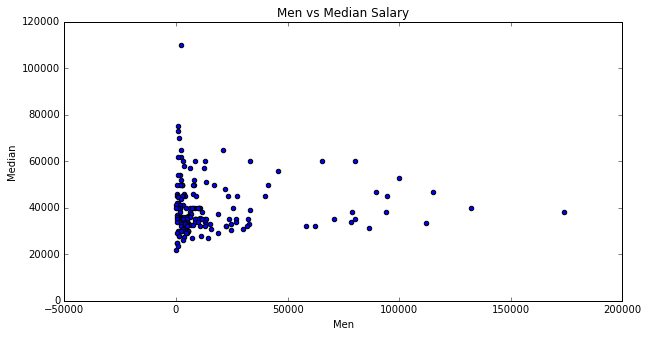

In [14]:
recent_grads.plot(kind='scatter', x='Men', y='Median', title='Men vs Median Salary', figsize=(10,5))

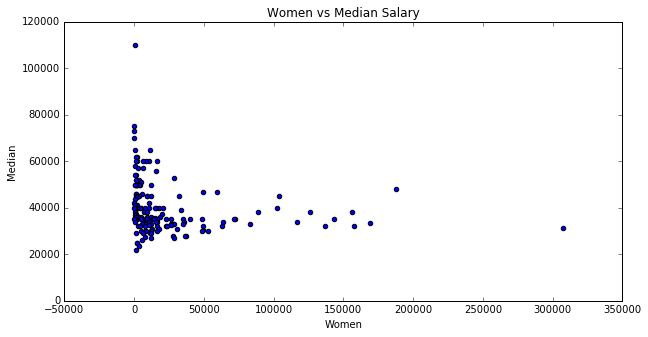

In [15]:
recent_grads.plot(kind='scatter', x='Women', y='Median', title='Women vs Median Salary', figsize=(10,5))

From the 2 graphs above, the only difference we can observe is that there is a major/s that is women-dominated wherein 300k are women around 175k are men. However, both earn more or less the same which is around 30k. Regardless of gender, both most likely earn the same amount.

## Histogram Viz
### Sample Size

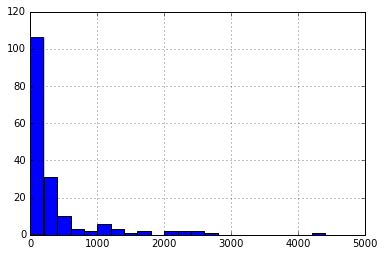

In [16]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

### Median

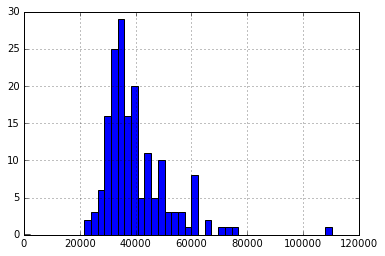

In [17]:
recent_grads['Median'].hist(bins=50, range=(0, 120000))

### Employed

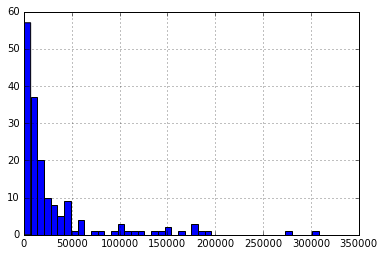

In [18]:
recent_grads['Employed'].hist(bins=50, range=(0,350000))

### Share of Women

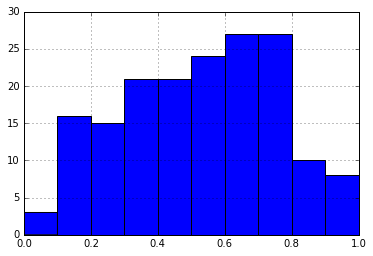

In [19]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1))

### Unemployment Rate

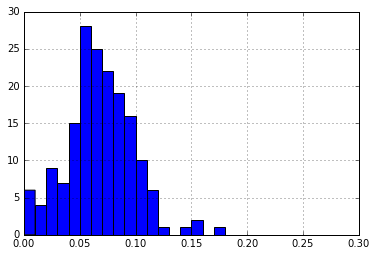

In [20]:
recent_grads['Unemployment_rate'].hist(bins=30, range=(0,0.3))

### Men

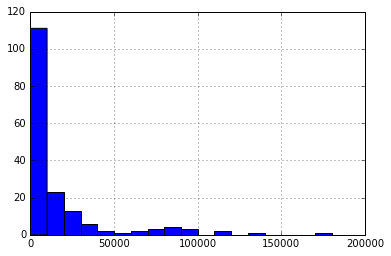

In [21]:
recent_grads['Men'].hist(bins=20, range=(0,200000))

### Women

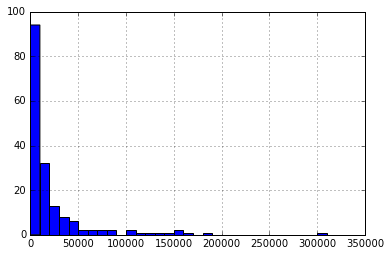

In [22]:
recent_grads['Women'].hist(bins=35, range=(0,350000))

### Analysis of Histogram Graphs
Median salary of graduates revolves around 35-37.5k. A big number of college majors are predominantly female (more than 0.5 Share of Women) while there are little, specifically less than 5 majors, are predominantly male.

## ScatterMatrix plots

In [23]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06f69e24e0>,
      dtype=object)

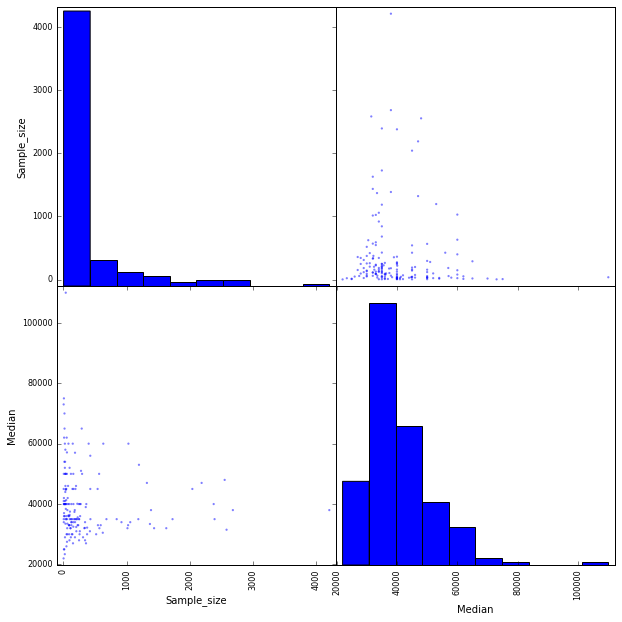

In [24]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06f683bc88>,
      dtype=object)

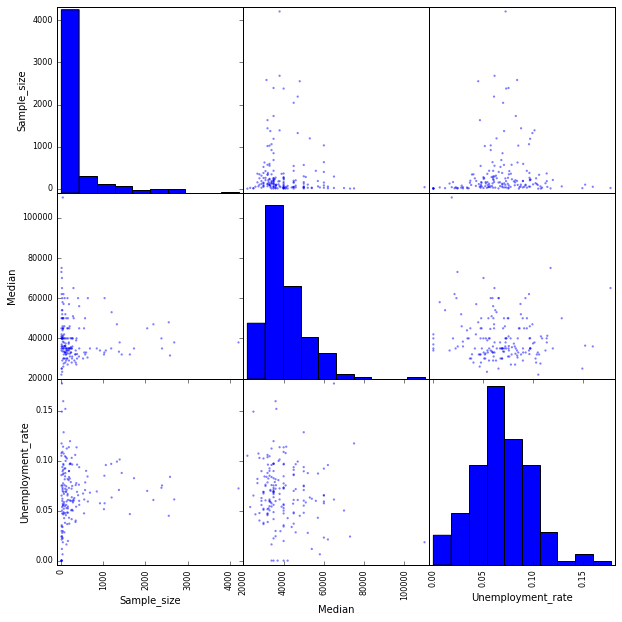

In [25]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

We can see from Median vs Unemployment Rate that there are majors that have high unemployment rate but are also higher paying than the average.

### Bar Plots

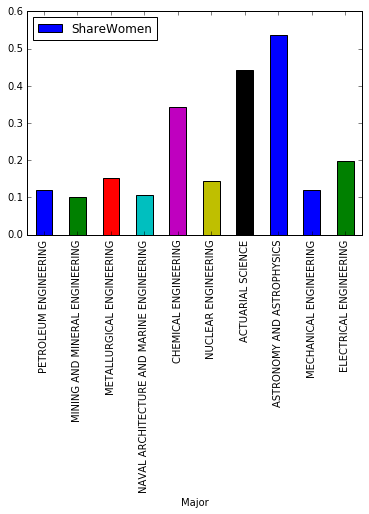

In [27]:
recent_grads[:10].plot.bar('Major', 'ShareWomen')

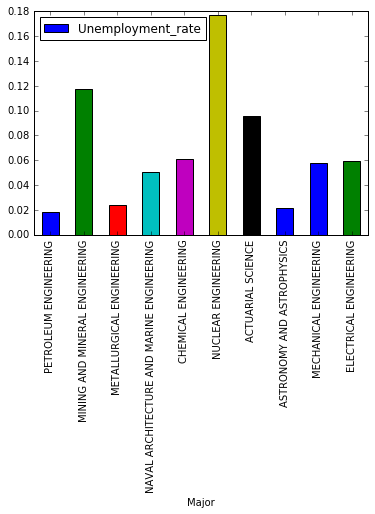

In [28]:
recent_grads[:10].plot.bar('Major', 'Unemployment_rate')

Just by observing the bar graphs we can see the distribution of college majors in terms of the share of women and unemployment rate of the first 10 ranks. Surprisingly, it's difficult to find/maintain a job in the are of nuclear engineering with ~0.18 rate. On the other hand, more than half of the class can be consisted of women in the college of astronomy and astrophysics.

If we want to explore more, it would be helpful to see their distributions by college category/industry (e.g. Engineering, IT, Medicine etc). Also the following:

* Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
* Use a box plot to explore the distributions of median salaries and unemployment rate.
* Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.